In [184]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [185]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_train)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Train_Foot.csv


In [186]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,homeTeam,awayTeam,score,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154
1,1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054
2,2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815
3,3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045
4,4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,375,2018-05-19,Villarreal,Real Madrid,0.0,2.0,2.0,0.0,2.0,2.0,...,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862,6451,15239
11515,376,2018-05-20,Ath Bilbao,Espanol,2.0,0.0,1.0,0.0,1.0,1.0,...,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085,4273,5802
11516,377,2018-05-20,Ath Madrid,Eibar,0.0,2.0,2.0,1.0,1.0,2.0,...,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212,13709,4725
11517,378,2018-05-20,Barcelona,Sociedad,1.0,1.0,0.0,0.0,0.0,0.0,...,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212,14840,4571


In [187]:
train_columns={'win_cons_home':train_csv.win_cons_home,'win_cons_away':train_csv.win_cons_away,'lose_cons_home':train_csv.lose_cons_home,'lose_cons_away':train_csv.lose_cons_away,'puissance_HomeTeam':train_csv.puissance_HomeTeam,'puissance_AwayTeam':train_csv.puissance_AwayTeam}
df = pd.DataFrame(train_columns)
X = df.values
X

array([[    0,     0,     0,     0,  2409,  6154],
       [    0,     0,     0,     0,  4008,  3054],
       [    0,     0,     0,     0,  3029,  4815],
       ...,
       [    1,     2,     0,     0, 13709,  4725],
       [    0,     1,     1,     0, 14840,  4571],
       [    1,     0,     0,     1,  8716,   100]], dtype=int64)

In [188]:
Y = train_csv['score'].values
Y[0]

2.0

In [189]:
x_train, x_validation, y_train, y_validation =train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)
y_train = y_train.astype(int)
y_validation = y_validation.astype(int)

(9215, 6) (9215,)


In [190]:
# for row in y_train:
#      print(row)

In [191]:
x_train

array([[    0,     0,     0,     0,   100,  9482],
       [    0,     0,     0,     0,   100,  3749],
       [    4,     0,     0,     1,  5815,   100],
       ...,
       [    0,     0,     1,     2,  3760,  4667],
       [    0,     0,     0,     0, 13560,   100],
       [    1,     0,     0,     0,  2132,  7289]], dtype=int64)

In [192]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [193]:
model = create_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_90 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_91 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_92 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_93 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_94 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_95 (Dense)             (None, 512)              

In [194]:
save = ModelCheckpoint('model_CNN.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [195]:
history = model.fit(x_train, y_train,validation_data=(x_validation,y_validation),batch_size=90,epochs=100,callbacks = [save])

Train on 9215 samples, validate on 2304 samples
Epoch 1/100
9090/9215 [============================>.] - ETA: 0s - loss: 16.7147 - accuracy: 0.4268
Epoch 00001: val_accuracy improved from -inf to 0.51476, saving model to model_CNN.h5
9215/9215 [==============================] - 3s 307us/sample - loss: 16.5038 - accuracy: 0.4273 - val_loss: 1.1151 - val_accuracy: 0.5148
Epoch 2/100
9180/9215 [============================>.] - ETA: 0s - loss: 1.1407 - accuracy: 0.4882
Epoch 00002: val_accuracy did not improve from 0.51476
9215/9215 [==============================] - 1s 97us/sample - loss: 1.1422 - accuracy: 0.4881 - val_loss: 1.1302 - val_accuracy: 0.5017
Epoch 3/100
8820/9215 [===========================>..] - ETA: 0s - loss: 1.0820 - accuracy: 0.5015
Epoch 00003: val_accuracy did not improve from 0.51476
9215/9215 [==============================] - 1s 113us/sample - loss: 1.0800 - accuracy: 0.5030 - val_loss: 1.0397 - val_accuracy: 0.4996
Epoch 4/100
8550/9215 [========================

Epoch 29/100
9090/9215 [============================>.] - ETA: 0s - loss: 0.9788 - accuracy: 0.5325
Epoch 00029: val_accuracy did not improve from 0.53038
9215/9215 [==============================] - 1s 86us/sample - loss: 0.9788 - accuracy: 0.5324 - val_loss: 0.9857 - val_accuracy: 0.5230
Epoch 30/100
8730/9215 [===========================>..] - ETA: 0s - loss: 0.9825 - accuracy: 0.5302
Epoch 00030: val_accuracy did not improve from 0.53038
9215/9215 [==============================] - 1s 84us/sample - loss: 0.9803 - accuracy: 0.5324 - val_loss: 0.9835 - val_accuracy: 0.5299
Epoch 31/100
8730/9215 [===========================>..] - ETA: 0s - loss: 0.9793 - accuracy: 0.5323
Epoch 00031: val_accuracy did not improve from 0.53038
9215/9215 [==============================] - 1s 82us/sample - loss: 0.9796 - accuracy: 0.5326 - val_loss: 0.9812 - val_accuracy: 0.5291
Epoch 32/100
8550/9215 [==========================>...] - ETA: 0s - loss: 0.9783 - accuracy: 0.5326
Epoch 00032: val_accuracy i

8910/9215 [============================>.] - ETA: 0s - loss: 0.9743 - accuracy: 0.5376
Epoch 00057: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 90us/sample - loss: 0.9760 - accuracy: 0.5368 - val_loss: 0.9896 - val_accuracy: 0.5260
Epoch 58/100
8820/9215 [===========================>..] - ETA: 0s - loss: 0.9747 - accuracy: 0.5375
Epoch 00058: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 86us/sample - loss: 0.9753 - accuracy: 0.5354 - val_loss: 0.9831 - val_accuracy: 0.5295
Epoch 59/100
8640/9215 [===========================>..] - ETA: 0s - loss: 0.9777 - accuracy: 0.5328
Epoch 00059: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 86us/sample - loss: 0.9782 - accuracy: 0.5327 - val_loss: 0.9828 - val_accuracy: 0.5282
Epoch 60/100
9090/9215 [============================>.] - ETA: 0s - loss: 0.9746 - accuracy: 0.5353
Epoch 00060: val_accuracy did not improv

9090/9215 [============================>.] - ETA: 0s - loss: 0.9779 - accuracy: 0.5344
Epoch 00085: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 142us/sample - loss: 0.9781 - accuracy: 0.5348 - val_loss: 1.0029 - val_accuracy: 0.5282
Epoch 86/100
8910/9215 [============================>.] - ETA: 0s - loss: 0.9799 - accuracy: 0.5339
Epoch 00086: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 106us/sample - loss: 0.9801 - accuracy: 0.5347 - val_loss: 0.9919 - val_accuracy: 0.5239
Epoch 87/100
8730/9215 [===========================>..] - ETA: 0s - loss: 0.9722 - accuracy: 0.5370
Epoch 00087: val_accuracy did not improve from 0.53212
9215/9215 [==============================] - 1s 98us/sample - loss: 0.9737 - accuracy: 0.5348 - val_loss: 0.9826 - val_accuracy: 0.5295
Epoch 88/100
8640/9215 [===========================>..] - ETA: 0s - loss: 0.9797 - accuracy: 0.5308
Epoch 00088: val_accuracy did not impr

Text(0, 0.5, 'Accuracy')

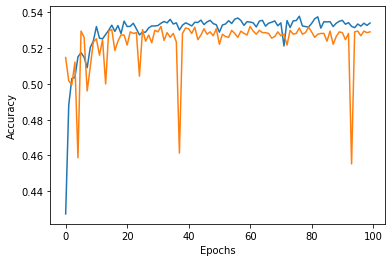

In [197]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [198]:
test_csv=  pd.read_csv(Data_test,sep=";",encoding="utf-8")
display(test_csv)

,Unnamed: 0,date,status,homeTeam,awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,1417,2020-06-28,FINISHED,UC Sampdoria,Bologna FC 1909,0,0,2,2,1.111111,1.407407,0.259259,0.555556,1.777778,1.629630,0.962963,0.925926,2588,3818
1,1416,2020-06-28,FINISHED,Udinese Calcio,Atalanta BC,0,7,1,0,0.777778,2.657143,0.407407,1.142857,1.085714,1.514286,0.485714,0.742857,3100,7928
2,1415,2020-06-28,FINISHED,SSC Napoli,SPAL 2013,2,0,0,1,1.617647,0.740741,0.705882,0.333333,1.518519,1.666667,0.666667,0.740741,7165,2242
3,691,2020-06-28,FINISHED,Watford FC,Southampton FC,0,0,1,1,0.903226,1.225806,0.419355,0.548387,1.483871,1.741935,0.612903,0.741935,2817,2956
4,1414,2020-06-28,FINISHED,AC Milan,AS Roma,1,3,0,0,1.185185,1.962963,0.444444,0.888889,1.296296,1.333333,0.407407,0.666667,4490,6735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2024,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,1,0,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000,6562,5314
291,2025,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,0,0,4,1,0.800000,0.833333,0.333333,0.566667,1.333333,1.666667,0.533333,0.700000,3593,1589
292,2026,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,0,2,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333,3175,3593
293,2027,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,0,0,1,3,0.800000,0.766667,0.400000,0.466667,1.333333,1.966667,0.600000,0.766667,1067,1159


In [201]:
# test_columns={'win_cons_home':test_csv.win_cons_home,'win_cons_away':test_csv.win_cons_away,'lose_cons_home':test_csv.lose_cons_home,'lose_cons_away':test_csv.lose_cons_away,'puissance_HomeTeam':test_csv.puissance_HomeTeam,'puissance_AwayTeam':test_csv.puissance_AwayTeam}
# df = pd.DataFrame(test_columns)
# x_test = df.values
# x_test

In [202]:
# y_test = test_csv['score'].values
# y_test[58]

In [203]:
# print(test_csv.shape)
# print(train_csv.shape)

In [204]:
# predictions = model.predict((x_test, y_test))

In [205]:
# print(x_test[1])
# print(y_test[1])
# plt.show()
# preds = model.predict((x_test, y_test))
# print(preds[1])
# np.argmax(predictions[1])

# Prédiction Unique

In [225]:
test = test_csv.drop(['status','date'],axis=1)
unique = test.values
results = []
equal = []
victory = []
loss = []
i = 0
unique.shape
cpt = 0
unique[1]

array([1416, 'Udinese Calcio', 'Atalanta BC', 0, 7, 1, 0,
       0.7777777777777778, 2.657142857142857, 0.4074074074074074,
       1.1428571428571428, 1.0857142857142856, 1.5142857142857142,
       0.4857142857142857, 0.7428571428571429, 3100, 7928], dtype=object)

In [228]:
model.load_weights("model_CNN.h5")

In [230]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[3]
    win_cons_away = i[4]
    lose_cons_home = i[5]
    lose_cons_away= i[6]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire,perte,puissance_homeTeam,puissance_awayTeam,cpt)
    cpt = cpt+1

1 26.98163092136383 37.20320165157318 35.73892116546631 2588 3818 0
2 15.649224817752838 24.64935928583145 59.69949960708618 3100 7928 1
1 21.654903888702393 65.54666757583618 12.794101238250732 7165 2242 2
1 29.545211791992188 41.597431898117065 28.758573532104492 2817 2956 3
2 23.119905591011047 32.965484261512756 43.888989090919495 4490 6735 4
2 21.325187385082245 31.086212396621704 47.574204206466675 6273 8949 5
1 28.153419494628906 38.729795813560486 33.01725685596466 2325 3175 6
2 16.35558158159256 25.486254692077637 58.15562605857849 4554 8949 7
1 29.396742582321167 44.77636218070984 25.778698921203613 4803 3861 8
1 29.4863224029541 43.49815547466278 26.953622698783875 4146 3781 9
1 29.469633102416992 41.1208301782608 29.30496633052826 7881 7427 10
1 28.853148221969604 39.85114097595215 31.18896186351776 1159 1842 11
2 16.553248465061188 25.719138979911804 57.72486925125122 1672 6562 12
2 17.186492681503296 26.462659239768982 56.347352266311646 1215 6206 13
1 29.5522540807724 41

1 29.4679194688797 41.116830706596375 29.310646653175354 3883 3982 118
2 26.472309231758118 36.606863141059875 36.85413599014282 2512 3890 119
2 9.861309826374054 17.136771976947784 73.0017900466919 2817 10390 120
1 29.010766744613647 40.163564682006836 30.717813968658447 2482 2956 121
1 25.4803329706192 56.61650896072388 17.896392941474915 7311 4146 122
2 13.703219592571259 22.24569171667099 64.05025720596313 1553 7938 123
1 22.933652997016907 63.28444480895996 13.781377673149109 14695 8832 124
1 16.711317002773285 75.73959827423096 7.548483461141586 10390 1880 125
2 4.923126846551895 9.608478844165802 85.46838760375977 3890 14695 126
1 21.279342472553253 66.33723378181458 12.380332499742508 7938 2817 127
1 29.310262203216553 44.69234347343445 25.95188617706299 8832 7311 128
1 28.519228100776672 48.83803725242615 22.614751756191254 3982 2482 129
2 23.862001299858093 33.75803232192993 42.347219586372375 5188 7151 130
1 29.09652590751648 47.19187021255493 23.676083981990814 3781 2512 13

2 25.87185502052307 35.89786887168884 38.17298412322998 2242 3817 234
1 29.39363121986389 45.79395055770874 24.766038358211517 9035 7165 235
1 27.226832509040833 37.499260902404785 35.19228994846344 2679 3818 236
1 21.202467381954193 66.69042706489563 12.101644277572632 6846 1140 237
2 15.585239231586456 24.57217276096344 59.84072685241699 3080 7928 238
1 28.088533878326416 49.410608410835266 22.470882534980774 3100 1781 239
2 24.59380030632019 34.5355361700058 40.82912802696228 2588 4490 240
2 11.904848366975784 19.917848706245422 68.17694306373596 2866 9319 241
2 21.084752678871155 30.83241581916809 48.06954562664032 3817 6735 242
1 29.618754982948303 43.061259388923645 27.249380946159363 2280 2242 243
1 28.8470059633255 47.618475556373596 23.500145971775055 3086 1932 244
1 28.378593921661377 49.64183270931244 21.95848524570465 9319 6735 245
1 29.39852476119995 40.957096219062805 29.53850030899048 7165 6846 246
1 28.66479456424713 48.735982179641724 22.572360932826996 4490 2866 247
2

In [231]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [232]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [233]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

array([35.73892117, 59.69949961, 12.79410124, 28.75857353, 43.88898909,
       47.57420421, 33.01725686, 58.15562606, 25.77869892, 26.9536227 ,
       29.30496633, 31.18896186, 57.72486925, 56.34735227, 28.55741084,
       20.0796634 , 51.54700875, 22.56685346, 38.41147423, 54.90819812,
       57.92403221, 69.58876252, 48.81873429, 42.90620387, 10.74715257,
       36.49936914, 37.07725704, 66.30621552, 32.60118961, 35.82302928,
       17.90881306, 30.83975613,  9.0022631 , 32.30110705, 15.01191407,
       30.37892878, 24.99998808, 27.78717279, 32.13634491, 27.64246762,
       16.00073725, 59.98213887, 26.77763104, 25.73900521, 25.74597597,
       48.32670391,  9.31836888, 21.6556862 , 19.01986301, 43.39058399,
       14.77810591, 13.29374909, 25.61980188, 35.56846082, 10.72543263,
       22.52099514, 31.1650306 , 61.71253324, 26.64087415, 11.80434823,
       21.34023011, 14.33475763, 60.85438728, 12.43144274, 23.43623489,
       25.7873565 , 60.83684564, 25.81907213, 30.6329906 , 31.41

In [150]:
predictions1[0]

array([1.6778305e-01, 7.3611397e-01, 9.6100457e-02, 1.1786084e-08,
       2.5748161e-06], dtype=float32)

In [151]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

171
171


(171,)

In [240]:
df = {'date':test_csv.date,'status':test_csv.status,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':np.around(equal,decimals=2),'prediction_homeTeam_victory':np.around(victory,decimals=2),'prediction_awayTeam_victory':np.around(loss,decimals=2),'match_state':results}

In [241]:
d = pd.DataFrame(df)

In [242]:
d

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-06-28,FINISHED,UC Sampdoria,Bologna FC 1909,26.98,37.20,35.74,1
1,2020-06-28,FINISHED,Udinese Calcio,Atalanta BC,15.65,24.65,59.70,2
2,2020-06-28,FINISHED,SSC Napoli,SPAL 2013,21.65,65.55,12.79,1
3,2020-06-28,FINISHED,Watford FC,Southampton FC,29.55,41.60,28.76,1
4,2020-06-28,FINISHED,AC Milan,AS Roma,23.12,32.97,43.89,2
...,...,...,...,...,...,...,...,...
290,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,29.40,44.83,25.71,1
291,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,26.15,53.70,20.13,1
292,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,28.95,40.03,30.91,1
293,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,29.53,43.36,27.05,1


In [243]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')

In [257]:
finished = []
scheduled = []

In [265]:
for i in d.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [271]:
column_names = ["date", "status", "homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [272]:
df_fini

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-06-28,FINISHED,UC Sampdoria,Bologna FC 1909,26.98,37.20,35.74,1
1,2020-06-28,FINISHED,Udinese Calcio,Atalanta BC,15.65,24.65,59.70,2
2,2020-06-28,FINISHED,SSC Napoli,SPAL 2013,21.65,65.55,12.79,1
3,2020-06-28,FINISHED,Watford FC,Southampton FC,29.55,41.60,28.76,1
4,2020-06-28,FINISHED,AC Milan,AS Roma,23.12,32.97,43.89,2
...,...,...,...,...,...,...,...,...
80,2020-07-05,FINISHED,Brescia Calcio,Hellas Verona FC,27.52,37.87,34.53,1
81,2020-07-06,FINISHED,Tottenham Hotspur FC,Everton FC,26.19,54.87,18.93,1
82,2020-07-06,FINISHED,Sevilla FC,SD Eibar,23.76,60.08,16.16,1
83,2020-07-06,FINISHED,Levante UD,Real Sociedad de Fútbol,21.00,30.75,48.24,2


In [274]:
df_programme

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-07-07,SCHEDULED,Crystal Palace FC,Chelsea FC,15.63,24.62,59.75,2
1,2020-07-07,SCHEDULED,Watford FC,Norwich City FC,29.35,46.29,24.32,1
2,2020-07-07,SCHEDULED,Arsenal FC,Leicester City FC,27.41,51.99,20.59,1
3,2020-07-08,SCHEDULED,Manchester City FC,Newcastle United FC,18.97,71.04,9.98,1
4,2020-07-08,SCHEDULED,Sheffield United FC,Wolverhampton Wanderers FC,19.48,29.09,51.42,2
...,...,...,...,...,...,...,...,...
205,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,29.40,44.83,25.71,1
206,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,26.15,53.70,20.13,1
207,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,28.95,40.03,30.91,1
208,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,29.53,43.36,27.05,1


In [276]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

In [277]:
df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')